<a href="https://colab.research.google.com/github/NguyenNgocQuyen29/Project_AI/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***1. Khai báo các thư viện cần sử dụng ***

In [ ]:
!pip install tensorflow

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

**2. Kết nối với Google Drive để đọc và lưu dữ liệu**

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3. Khai báo đường dẫn thư mục chứa ảnh dữ liệu**

In [29]:
import os
train_image_files_path = "/content/drive/MyDrive/Chest_X_Ray/Train"
test_image_files_path = "/content/drive/MyDrive/Chest_X_Ray/Test"

**4. Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1./255)  
test_data_gen = ImageDataGenerator(rescale=1./255)

**5. Đọc dữ liệu train và validation**

In [31]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),
    batch_size = 3,           
    class_mode='categorical')      

test_generator = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size=(200, 200),
    batch_size = 3,                 
    class_mode='categorical')

Found 459 images belonging to 4 classes.
Found 98 images belonging to 4 classes.


In [32]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

In [33]:
#gán nhãn
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

**6. Xây dựng mô hình**

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(64,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  

# lớp CNN4
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2)) 
 
  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(4, activation=tf.nn.softmax)) # 4 đầu ra 
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 16)      

**7. Thiết lập các tham số để huấn luyện mô hình**

In [35]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

**8. Huấn luyện mô hình**

In [36]:
EPOCHS=20
batch_size = 128
history=model.fit(
    train_generator,
    epochs=EPOCHS,batch_size=batch_size,
    verbose=1,
    validation_data = test_generator)

Epoch 1/20
153/153 [==============================] - 15s 81ms/step - loss: 1.1451 - acc: 0.4989 - val_loss: 0.9184 - val_acc: 0.6020
Epoch 2/20
153/153 [==============================] - 13s 86ms/step - loss: 0.5774 - acc: 0.8083 - val_loss: 0.5220 - val_acc: 0.8265
Epoch 3/20
153/153 [==============================] - 14s 90ms/step - loss: 0.4143 - acc: 0.8584 - val_loss: 0.8711 - val_acc: 0.6939
Epoch 4/20
153/153 [==============================] - 14s 92ms/step - loss: 0.3176 - acc: 0.8911 - val_loss: 1.0306 - val_acc: 0.6633
Epoch 5/20
153/153 [==============================] - 15s 98ms/step - loss: 0.2804 - acc: 0.8998 - val_loss: 0.6591 - val_acc: 0.7857
Epoch 6/20
153/153 [==============================] - 13s 85ms/step - loss: 0.1504 - acc: 0.9412 - val_loss: 1.1045 - val_acc: 0.7551
Epoch 7/20
153/153 [==============================] - 14s 90ms/step - loss: 0.1885 - acc: 0.9325 - val_loss: 1.2695 - val_acc: 0.7449
Epoch 8/20
153/153 [==============================] - 13s 88ms

In [37]:
#lưu mô hình
model.save('/content/drive/MyDrive/Chest_X_Ray/Chest_XRAY_cnn.h5')

**9.Thử nghiệm mô hình**

In [ ]:
!pip install opencv-python

In [39]:
# Let's compile the model 
model.compile(optimizer =tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_image_files_path))):
  for item in os.listdir(os.path.join(test_image_files_path,str(i))):
    img= cv2.imread(os.path.join(test_image_files_path,str(i),item))
    img = cv2.resize(img,(200,200))
    image.append(img)
    img = img / 255
    img = img.reshape(1,200,200,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

In [41]:
len(original)

98

In [42]:
#do chinh xac cua mo hinh
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.8061224489795918


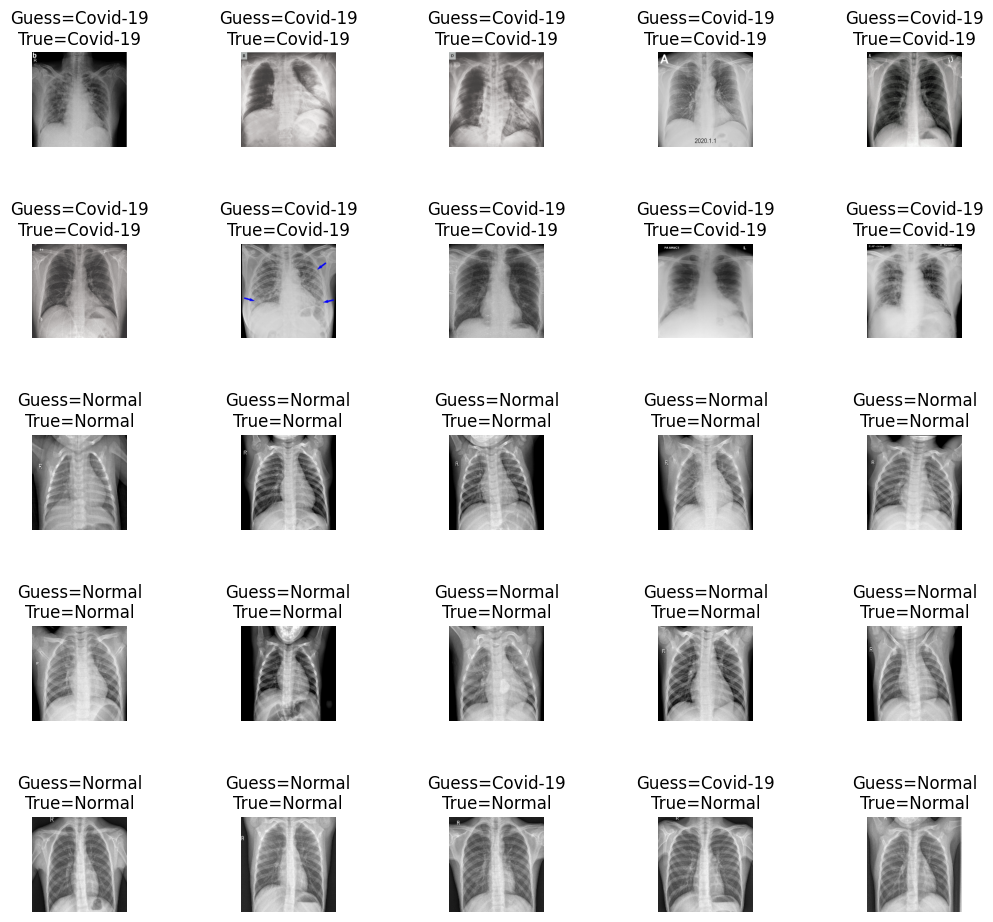

In [43]:
#tạo ra một lưới ảnh bao gồm 25 ảnh ,cùng với nhãn dán tương ứng của chúng
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 

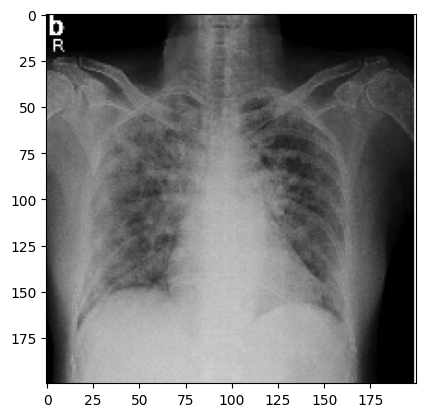

1/1 [==============================] - 0s 31ms/step
[0]
Dự đoán : Covid


In [44]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
#folder nhãn 0 là covid
img = load_img('/content/drive/MyDrive/Chest_X_Ray/Test/0/1-s2.0-S0929664620300449-gr2_lrg-b.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,200,200,3)
img = img.astype('float32')
img = img /255
perdiction =np.argmax(model.predict(img),axis=-1)
print(perdiction)
if (perdiction == 0) :
  print('Dự đoán : Covid')
if (perdiction == 1) :
  print('Dự đoán : Normal ')
if (perdiction == 2) :
  print('Dự đoán :  Viral Pneumonia')
if (perdiction == 3) :
  print('Dự đoán : Bacterial Pneumonia')

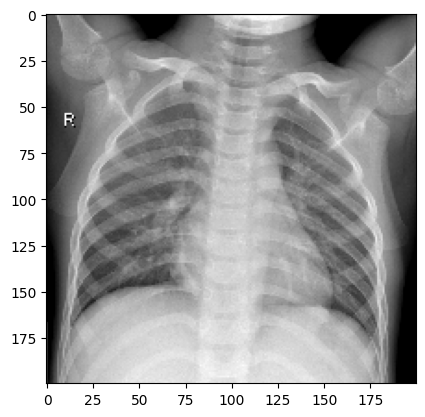

1/1 [==============================] - 0s 25ms/step
[1]
Dự đoán : Normal 


In [45]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
#folder nhãn 1 là bình thường
img = load_img('/content/drive/MyDrive/Chest_X_Ray/Test/1/IM-0172-0001.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,200,200,3)
img = img.astype('float32')
img = img /255
perdiction =np.argmax(model.predict(img),axis=-1)
print(perdiction)
if (perdiction == 0) :
  print('Dự đoán : Covid')
if (perdiction == 1) :
  print('Dự đoán : Normal ')
if (perdiction == 2) :
  print('Dự đoán :  Viral Pneumonia')
if (perdiction == 3) :
  print('Dự đoán : Bacterial Pneumonia')

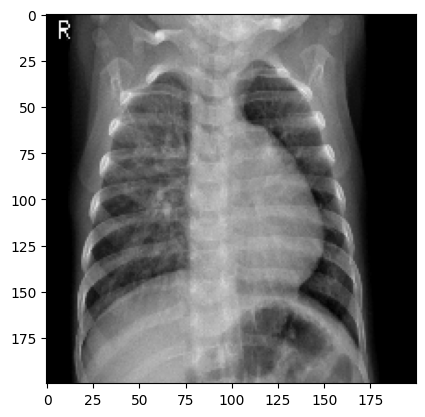

1/1 [==============================] - 0s 22ms/step
[2]
Dự đoán :  Viral Pneumonia


In [46]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
#folder nhãn 2 là Viral Pneumonia
img = load_img('/content/drive/MyDrive/Chest_X_Ray/Test/2/person273_virus_562.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,200,200,3)
img = img.astype('float32')
img = img /255
perdiction =np.argmax(model.predict(img),axis=-1)
print(perdiction)
if (perdiction == 0) :
  print('Dự đoán : Covid')
if (perdiction == 1) :
  print('Dự đoán : Normal ')
if (perdiction == 2) :
  print('Dự đoán :  Viral Pneumonia')
if (perdiction == 3) :
  print('Dự đoán : Bacterial Pneumonia')

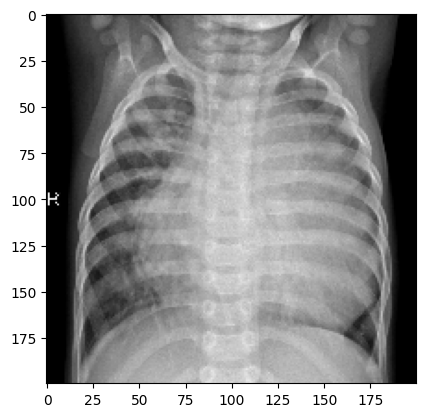

1/1 [==============================] - 0s 24ms/step
[3]
Dự đoán : Bacterial Pneumonia


In [47]:
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array 
from keras.utils import load_img 
import numpy as np
#folder nhãn 3 là Bacterial Pneumonia
img = load_img('/content/drive/MyDrive/Chest_X_Ray/Test/3/person5_bacteria_15.jpg',target_size=(200,200))
plt.imshow(img)
plt.show()
img= img_to_array(img)
img =img.reshape(1,200,200,3)
img = img.astype('float32')
img = img /255
perdiction =np.argmax(model.predict(img),axis=-1)
print(perdiction)
if (perdiction == 0) :
  print('Dự đoán : Covid')
if (perdiction == 1) :
  print('Dự đoán : Normal ')
if (perdiction == 2) :
  print('Dự đoán :  Viral Pneumonia')
if (perdiction == 3) :
  print('Dự đoán : Bacterial Pneumonia')